# 0.0 Imports and Load Data

## 0.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
import datetime
import warnings
import re
import pickle

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import umap.umap_ as umap
from scipy.cluster import hierarchy as hc
import scipy.stats as st

from ydata_profiling import ProfileReport
import sweetviz as sv

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import ensemble      as en
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold      as mn
from sklearn import mixture       as mx

warnings.filterwarnings('ignore')

/home/bruno/anaconda3/envs/ds-insiders/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/bruno/anaconda3/envs/ds-insiders/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/bruno/anaconda3/envs/ds-insiders/lib/python3.10/site-pac

## 0.2 Load Data

In [2]:
# df = pd.read_csv('data/Ecommerce.csv', encoding = 'windows-1252')
df = pd.read_excel('data_original/online_retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
487894,577783,22951,60 CAKE CASES DOLLY GIRL DESIGN,48,2011-11-21 16:20:00,0.55,18139.0,United Kingdom
268343,560410,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,2011-07-18 14:28:00,39.95,17213.0,United Kingdom
149404,549294,21535,RED RETROSPOT SMALL MILK JUG,1,2011-04-07 19:27:00,2.55,13230.0,United Kingdom
147987,549155,22994,TRAVEL CARD WALLET RETROSPOT,1,2011-04-06 17:08:00,0.83,NaN,United Kingdom
354206,567866,84375,SET OF 20 KIDS COOKIE CUTTERS,8,2011-09-22 14:13:00,2.10,16669.0,United Kingdom
165656,550819,23127,FELTCRAFT GIRL NICOLE KIT,1,2011-04-20 17:37:00,4.95,17530.0,United Kingdom
397446,571184,22776,SWEETHEART 3 TIER CAKE STAND,8,2011-10-14 11:09:00,9.95,15478.0,United Kingdom
186622,552874,84279B,CHERRY BLOSSOM DECORATIVE FLASK,4,2011-05-12 09:40:00,3.75,12621.0,Germany
270021,560538,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-07-19 12:19:00,1.25,16128.0,United Kingdom
471548,576644,21989,PACK OF 20 SKULL PAPER NAPKINS,6,2011-11-16 10:01:00,1.63,NaN,United Kingdom


In [5]:
print('Os nomes das colunas são: \n{}\n'.format(df.columns))
print('As colunas e os tipos do conjunto de dados são: \n{}\n'.format(df.dtypes))
print('O tamanho do conjunto de dados é (linhas, colunas): \n{}\n'.format(df.shape))
print('A quantidade de linhas vazias para cada coluna é: \n{}\n'.format(df.isna().sum()))

Os nomes das colunas são: 
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

As colunas e os tipos do conjunto de dados são: 
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

O tamanho do conjunto de dados é (linhas, colunas): 
(541909, 8)

A quantidade de linhas vazias para cada coluna é: 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64



# 1.0 Data Cleaning

## 1.1 Initial Cleaning

In [6]:
df1 = df.copy()

In [7]:
# # dropando coluna desnecessária
# df1 = df1.drop('Unnamed: 8', axis = 1)

In [8]:
# renomeando colunas
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df1.columns = cols_new

In [9]:
# alterando os tipos dos dados
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format = '%d-%b-%y')
df1['invoice_no'] = df1['invoice_no'].astype(str)
df1['stock_code'] = df1['stock_code'].astype(str)

## 1.2 Replacing NaN Values

### First Cicle

In [10]:
# # dropando clientes NAs
# df1 = df1.dropna(subset = ['Description', 'CustomerID'])

# # percentual de clientes eliminados da base
# removed_data = round((100*(1-(df1.shape[0]/df.shape[0]))), 2)
# print(f'Foram removidos {removed_data}% dos dados.')

### Second Cicle

In [11]:
# checando clientes sem id
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [12]:
# dropando transações duplicadas para que cada transação represente um único cliente
# essa solução não é a ideal, visto que um mesmo cliente pode realizar várias transações
# porém, como não temos a identificação destes clientes, é uma solução plausível para este ciclo de projeto
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup.head()

,invoice_no
622,536414
1443,536544
1970,536545
1971,536546
1972,536547


In [13]:
# substituindo os valores faltantes dos clientes por um número muito alto, para ficar fácil de diferenciar
# cada cliente será representado pelo id do cliente anterior + 1, para que não haja nenhum cliente repetido
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup), 1)

In [14]:
# unindo o dataset original com o dataset dos clientes NaNs preenchido
df1 = pd.merge(df1, df_backup, on = 'invoice_no', how = 'left')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN


In [15]:
# unindo o id do cliente que for igual nos 2 datasets em uma nova coluna
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN,17850.0


In [16]:
# dropando as colunas extras
df1 = df1.drop(columns = ['customer_id_x', 'customer_id_y'], axis = 1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850.0


In [17]:
# alterando os clientes de float para int
df1['customer_id'] = df1['customer_id'].astype(int)

# 2.0 Data Description

## 2.1 Checking Categorical Attributes

In [18]:
df2 = df1.copy()

In [19]:
# checando o código de pedidos que começam com letra (representam devoluções)
df_letter_invoices = df2.loc[df2['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]
df_letter_invoices.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
115506,C546131,22978,PANTRY ROLLING PIN,-6,2011-03-09 15:08:00,3.75,United Kingdom,16057


In [20]:
print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity'] < 0])))

Total number of invoices: 9291
Total number of negative quantity: 9288


In [21]:
# checando o código de produtos que não representam compras
df2.loc[df2['stock_code'].apply(lambda x: bool(re.search( '^[a-zA-Z]+$', x ))), 'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

## 2.2 Checking Numerical Attributes

In [22]:
# estatística descritiva das variáveis numéricas
df2.describe()

,quantity,unit_price,customer_id
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,16688.840453
std,218.081158,96.759853,2911.411352
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,16249.000000
75%,10.000000,4.130000,18283.000000
max,80995.000000,38970.000000,22709.000000


## 2.3 Filtering

In [23]:
# removendo preços nulos e quase nulos
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# removendo produtos com códigos que não representam compras
df2 = df2[~df2['stock_code'].isin(['POST','D','DOT','M','S','AMAZONFEE','m','DCGSSBOY','DCGSSGIRL','PADS','B','CRUK'])]

# removendo a coluna description
df2 = df2.drop(columns = 'description', axis = 1)

# removendo clientes de países não específicados
# foi escolhido remover estes clientes por representarem uma quantidade muito baixa de clientes em relação ao todo
df2 = df2[~df2['country'].isin(['European Community','Unspecified'])]

In [24]:
# cliente com compra/devolução estranha (valor muito alto/outlier)
df2_bad_users = df2[df2['customer_id'] == 16446]
df2_bad_users

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2011-05-18 09:52:00,1.65,United Kingdom,16446
194355,553573,22982,1,2011-05-18 09:52:00,1.25,United Kingdom,16446
540421,581483,23843,80995,2011-12-09 09:15:00,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2011-12-09 09:27:00,2.08,United Kingdom,16446


In [25]:
# removendo maus usuários (cliente com comportamento estranho)
df2 = df2[~df2['customer_id'].isin([16446])]

In [26]:
# criando dataframes de devoluções e de compras para avaliar as compras e as devoluções posteriormente na EDA
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchases = df2.loc[df2['quantity'] >= 0, :]

# 3.0 Feature Engineering

## 3.1 Feature Creation

In [27]:
df3 = df2.copy()

In [28]:
# remove possíveis linhas duplicadas
df_ref = df3.drop(['invoice_no','stock_code','quantity','invoice_date','unit_price','country'], axis = 1).drop_duplicates(ignore_index = True)
df_ref.shape # verifica a quantidade de linhas remanescentes

(5786, 1)

In [29]:
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [30]:
# faturamento
df2['gross_revenue'] = df2['quantity']*df2['unit_price']

# monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()

# merge
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')

# verifica se algum cliente do dataframe de referência não tem correspondente no dataframe monetary
# se isso acontecesse, as linhas da coluna 'gross_revenue' sem clientes correspondentes iriam ser preenchidas com NaN
print(df_ref.isna().sum())

customer_id      0
gross_revenue    0
dtype: int64


In [31]:
# compra mais recente de cada cliente
df_recency = df2_purchases[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()

# data da compra mais recente no geral - data da compra mais recente de cada cliente
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days

# invertendo a data da recência, pois o modelo entende que quanto maior o valor, melhor
df_recency['recency_days'] = df_recency['recency_days'].apply(lambda x: 1/x if x != 0 else 1)

# merge
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how = 'left')

In [32]:
# recência média de cada cliente
df_aux = df2_purchases[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending = [False, False])
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['previous_date'] = df_aux['invoice_date'].shift()
df_aux.head(20)

,customer_id,invoice_date,next_customer_id,previous_date
541323,22709,2011-12-09 10:26:00,NaN,NaT
541264,22708,2011-12-09 10:23:00,22709.0,2011-12-09 10:26:00
540451,22707,2011-12-09 10:03:00,22708.0,2011-12-09 10:23:00
539207,22706,2011-12-08 16:30:00,22707.0,2011-12-09 10:03:00
539162,22705,2011-12-08 16:14:00,22706.0,2011-12-08 16:30:00
539073,22704,2011-12-08 15:49:00,22705.0,2011-12-08 16:14:00
537341,22700,2011-12-08 11:21:00,22704.0,2011-12-08 15:49:00
537051,22699,2011-12-08 10:53:00,22700.0,2011-12-08 11:21:00
536087,22696,2011-12-08 09:28:00,22699.0,2011-12-08 10:53:00
535379,22695,2011-12-08 09:20:00,22696.0,2011-12-08 09:28:00


In [33]:
df_aux['avg_recency_days'] = df_aux.apply(lambda x:(x['invoice_date']-x['previous_date']).days if x['customer_id'] == x['next_customer_id'] else 375, axis = 1)
df_aux.shape[0]

19689

In [34]:
df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis = 1).dropna()
df_aux.shape[0]

19689

In [35]:
# invertendo a data da recência, pois o modelo entende que quanto maior o valor, melhor
df_aux['avg_recency_days'] = df_aux['avg_recency_days'].apply(lambda x: 1/x if x != 375 else 0)

In [36]:
# recência média
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

# merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on = 'customer_id', how = 'left')
df_ref.isna().sum()

customer_id          0
gross_revenue        0
recency_days        91
avg_recency_days    91
dtype: int64

In [37]:
# quantidade de transações por cliente
df_qt_invoices = df2_purchases[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_qt_invoices = df_qt_invoices.rename(columns = {'invoice_no': 'qt_invoices'})

# drop_duplicates: é necessário, pois ao selecionar o id da compra e o id cliente aparecem linhas repetidas.
df_ref = pd.merge(df_ref, df_qt_invoices, on = 'customer_id', how = 'left')

In [38]:
# quantidade de produtos únicos comprados por cliente
df_qt_products = df2_purchases[['customer_id', 'stock_code']].groupby('customer_id').count().reset_index()
df_qt_products = df_qt_products.rename(columns = {'stock_code': 'qt_products'})

df_ref = pd.merge(df_ref, df_qt_products, on = 'customer_id', how = 'left')

In [39]:
# quantidade de itens totais comprados por cliente
df_qt_items = df2[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index()
df_qt_items = df_qt_items.rename(columns = {'quantity': 'qt_items'})

df_ref = pd.merge(df_ref, df_qt_items, on = 'customer_id', how = 'left')

In [40]:
# ticket médio por cliente
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index()
df_avg_ticket = df_avg_ticket.rename(columns = {'gross_revenue': 'avg_ticket'})

df_ref = pd.merge(df_ref, df_avg_ticket, on = 'customer_id', how = 'left')

In [41]:
# quantidade de devoluções por cliente
df_returns = df2_returns[['customer_id','quantity']].groupby('customer_id').sum().reset_index()
df_returns = df_returns.rename(columns = {'quantity': 'qt_returns'})

# multiplica por -1, pois as quantidades são negativas
df_returns['qt_returns'] = df_returns['qt_returns'] * -1

df_ref = pd.merge(df_ref, df_returns, how = 'left', on = 'customer_id' )

# caso a quantidade de returns for vazia, preenche a linha com 0 devoluções
df_ref.loc[df_ref['qt_returns'].isna(),'qt_returns'] = 0
df_ref.isna().sum()

customer_id          0
gross_revenue        0
recency_days        91
avg_recency_days    91
qt_invoices         91
qt_products         91
qt_items             0
avg_ticket           0
qt_returns           0
dtype: int64

In [42]:
# data da primeira compra - data da última compra
df_aux = df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates().groupby('customer_id')
df_aux = df_aux.agg(max_ = ('invoice_date', 'max'), min_ = ('invoice_date', 'min'), days_= ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1), buy_ = ('invoice_no', 'count'))
# precisa somar 1, pois esta diferença entre as datas irá no denominador quando calcular a frequência
# se houve só uma compra, a diferença entre as datas é 0
# logo, se não somar 1, será feita uma divisão por 0 e ocorrerá uma indeterminação
df_aux = df_aux.reset_index()

In [43]:
df_aux.head()

,customer_id,max_,min_,days_,buy_
0,12346,2011-01-18 10:01:00,2011-01-18 10:01:00,1,1
1,12347,2011-12-07 15:52:00,2010-12-07 14:57:00,366,7
2,12348,2011-09-25 13:13:00,2010-12-16 19:09:00,283,4
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,1
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,1


In [44]:
# frequência: quantidade de compras / diferença entre datas
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply(lambda x: x['buy_']/x['days_'] if x['days_'] != 0 else 0, axis = 1)

df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on = 'customer_id', how = 'left')
df_ref.isna().sum()

customer_id          0
gross_revenue        0
recency_days        91
avg_recency_days    91
qt_invoices         91
qt_products         91
qt_items             0
avg_ticket           0
qt_returns           0
frequency           91
dtype: int64

In [45]:
# quantidade de compras únicas e quantidade total de produtos por cliente
df_aux = df2[['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
df_aux = df_aux.agg(n_purchases = ('invoice_no', 'nunique'), n_products = ('quantity', 'sum')).reset_index()

# average basket size: quantidade total de produtos por cliente / quantidade de compras únicas
df_aux['basket_size'] = df_aux['n_products']/df_aux['n_purchases']

df_ref = pd.merge(df_ref, df_aux[['customer_id', 'basket_size']], how = 'left', on = 'customer_id')
df_ref.isna().sum()

customer_id          0
gross_revenue        0
recency_days        91
avg_recency_days    91
qt_invoices         91
qt_products         91
qt_items             0
avg_ticket           0
qt_returns           0
frequency           91
basket_size          0
dtype: int64

In [46]:
df_ref.head()

,customer_id,gross_revenue,recency_days,avg_recency_days,qt_invoices,qt_products,qt_items,avg_ticket,qt_returns,frequency,basket_size
0,17850,5288.63,0.002695,-0.969697,34.0,297.0,1693,16.950737,40.0,17.000000,48.371429
1,13047,3089.10,0.017857,-0.139765,9.0,171.0,1355,15.923196,35.0,0.028302,84.687500
2,12583,6629.34,0.500000,-0.048023,15.0,232.0,4978,28.209957,50.0,0.040431,292.823529
3,13748,948.25,0.010526,-0.020445,5.0,28.0,439,33.866071,0.0,0.017921,87.800000
4,15100,635.10,0.003003,-0.051768,3.0,3.0,58,105.850000,22.0,0.073171,9.666667


# 4.0 EDA

## 4.1 Univariate and Bivariate Analysis

In [47]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id         0
gross_revenue       0
recency_days        0
avg_recency_days    0
qt_invoices         0
qt_products         0
qt_items            0
avg_ticket          0
qt_returns          0
frequency           0
basket_size         0
dtype: int64

In [48]:
df4['customer_id'].nunique()

5695

In [49]:
len(df4['customer_id'].unique())

5695

In [50]:
# # análise univariada - profiling
# profile = ProfileReport(df4)
# profile.to_file('profile_report.html')

In [51]:
# # análise univariada - sweetviz
# report = sv.analyze(source = df4)
# report.show_html()

In [52]:
# análise bivariada
cols = ['customer_id']
df41 = df4.drop(cols, axis = 1)

# pairplot
fig = px.scatter_matrix(df41)
fig.update_layout(width = 1100, height = 1200)
fig.show()

# 5.0 Data Preparation and Feature Selection

## 5.1 Feature Selection and Preparation

In [53]:
# selecionando as features para o estudo do espaço de dados
cols_selected = ['customer_id','gross_revenue','recency_days','frequency','qt_invoices',
                 'qt_products','qt_items','qt_returns','basket_size','avg_ticket']
df42 = df4[cols_selected].copy() 

In [54]:
# reescala dos dados para poder realizar o estudo
mm_gross_revenue = pp.MinMaxScaler()
mm_recency_days = pp.MinMaxScaler()
mm_qt_invoices = pp.MinMaxScaler()
mm_qt_products = pp.MinMaxScaler()
mm_qt_items = pp.MinMaxScaler()
mm_avg_ticket = pp.MinMaxScaler()
mm_frequency = pp.MinMaxScaler()
mm_qt_returns = pp.MinMaxScaler()
mm_basket_size = pp.MinMaxScaler()

# distribuição não normal
df42['gross_revenue'] = mm_gross_revenue.fit_transform(df42[['gross_revenue']] )
df42['recency_days'] = mm_recency_days.fit_transform(df42[['recency_days']] )
# df42['avg_recency_days'] = mm.fit_transform(df42[['avg_recency_days']])
df42['qt_invoices'] = mm_qt_invoices.fit_transform(df42[['qt_invoices']])
df42['qt_products'] = mm_qt_products.fit_transform(df42[['qt_products']])
df42['qt_items'] = mm_qt_items.fit_transform(df42[['qt_items']])
df42['avg_ticket'] = mm_avg_ticket.fit_transform(df42[['avg_ticket']])
df42['frequency'] = mm_frequency.fit_transform(df42[['frequency']])
df42['qt_returns'] = mm_qt_returns.fit_transform(df42[['qt_returns']])
df42['basket_size'] = mm_basket_size.fit_transform(df42[['basket_size']])

X = df42.copy()

## 5.2 PCA

In [55]:
X_pca = X.drop(['customer_id'], axis = 1)
pca = dd.PCA(n_components = X_pca.shape[1])

In [56]:
principal_components = pca.fit_transform(X_pca)

In [57]:
# principal_components

In [58]:
# # 6 features
features = range(pca.n_components_)

In [59]:
# plt.bar(features, pca.explained_variance_ratio_)

In [60]:
df_pca = pd.DataFrame(principal_components)
# sns.scatterplot(x = 0, y = 1, data = df_pca)

In [61]:
# df_pca.head()

In [62]:
# o componente 0 é referente à primeira feature selecionada anteriormente (gross_revenue)
# quanto maior a variação do eixo y, mais a variável ajuda a selecionar os clusters
# com o PCA não é possível visualizar com clareza os clusters

## 5.3 UMAP

In [63]:
# # reduz o espaço de dados do PCA a um espaço em 2D
# reducer = umap.UMAP(random_state = 42)
# embedding = reducer.fit_transform(X)

# df_pca['embedding_x'] = embedding[:, 0]
# df_pca['embedding_y'] = embedding[:, 1]

# sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_pca)

## 5.4 t-SNE

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

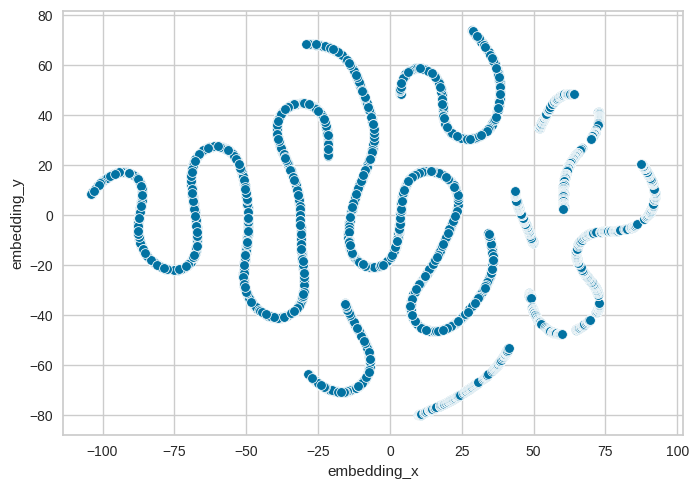

In [64]:
# redutor de dimensionalidade, funciona semelhante ao UMAP
reducer = mn.TSNE(n_components = 2, n_jobs = -1, random_state = 42)
embedding = reducer.fit_transform(X)

df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_pca)

## 5.5 Tree-Based Embedding

In [65]:
# escolhendo a variável gross_revenue como label, pois para construir um grupo de clientes fiéis
# uma das principais características desejadas é que este grupo gaste mais
X_tree = df42.drop(columns = ['customer_id', 'gross_revenue'], axis = 1)
y_tree = df42['gross_revenue']

rf_model = en.RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model.fit(X_tree, y_tree)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [66]:
# shape que tem como quantidade de linhas os clientes (cada linha é um cliente) e como colunas os estimators
# cada par de linha-coluna indica em qual posição o cliente daquela linha caiu naquela árvore
# Se as posições são próximas ao longo das árvores, significa que provavelmente aquele cliente está bem clusterizado
df_leaf = pd.DataFrame(rf_model.apply(X_tree))
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,6176,6407,6156,6270,6458,6456,6407,6341,6212,6535,...,6347,6062,6336,5809,6368,6371,6352,6386,6616,6159
1,6176,5761,6236,5777,6292,6394,6318,6176,5806,6231,...,5640,6067,6299,5911,5906,6312,5642,5915,5810,6027
2,6902,6778,6808,6814,6728,6972,6845,6870,6890,7012,...,6841,6818,6951,6821,6817,6910,6873,6876,6897,7001
3,4176,3892,4181,3818,4349,4151,3940,3978,4031,4484,...,3960,3522,4200,4153,3878,4555,3997,3567,4308,3307
4,1803,1948,891,1890,937,784,1272,1128,1099,1425,...,1820,989,1963,761,1224,1265,975,1904,994,1508


In [67]:
# redutor de dimensionalidade UMAP sobre o espaço criado pela Random Forest
reducer = umap.UMAP(random_state = 42, n_components = 3)
embedding = reducer.fit_transform(df_leaf)

df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]
df_tree['embedding_z'] = embedding[:, 2]

# sns.scatterplot(x = 'embedding_x', y = 'embedding_y', data = df_tree)
fig = px.scatter_3d(df_tree, x = 'embedding_x', y = 'embedding_y', z = 'embedding_z')
fig.show()

# 6.0 Modeling

## 6.1 Fine-Tuning

In [68]:
# df_tsne = df_pca[['embedding_x', 'embedding_y']]
# df_tsne.head()

In [69]:
# como os dados já foram reorganizados pelos embeddings da etapa anterior
# não é necessária uma nova preparação dos dados
# X = X.copy() # opção 1: clusterizar em cima do conjunto original (espaço de features)
# X = df_tsne.copy() # opção 2: clusterizar em cima do embedding criado pelo t-sne
X = df_tree.copy() # opção 3: clusterizar em cima do embedding criado pela random forest
X.head()

,embedding_x,embedding_y,embedding_z
0,-1.303210,7.857064,19.643066
1,0.842426,5.308868,19.641455
2,-0.378018,8.983745,-1.593624
3,7.951399,-6.804691,7.290690
4,17.837376,5.975533,6.787897


In [70]:
# fine tuning da quantidade de clusters
clusters = np.arange(5, 13, 1)

In [71]:
# checando se há valores do tipo None
none_check = X.applymap(lambda x: x is None)
print(none_check)

      embedding_x  embedding_y  embedding_z
0           False        False        False
1           False        False        False
2           False        False        False
3           False        False        False
4           False        False        False
...           ...          ...          ...
5690        False        False        False
5691        False        False        False
5692        False        False        False
5693        False        False        False
5694        False        False        False

[5695 rows x 3 columns]


In [72]:
none_check.value_counts()

embedding_x  embedding_y  embedding_z
False        False        False          5695
dtype: int64

## 6.2 K-Means

In [73]:
kmeans_list = []

for k in clusters:
    
    kmeans_model = c.KMeans(n_clusters = k, random_state = 42)
    kmeans_model.fit(X)
    
    labels = kmeans_model.predict(X)

    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    kmeans_list.append(sil)

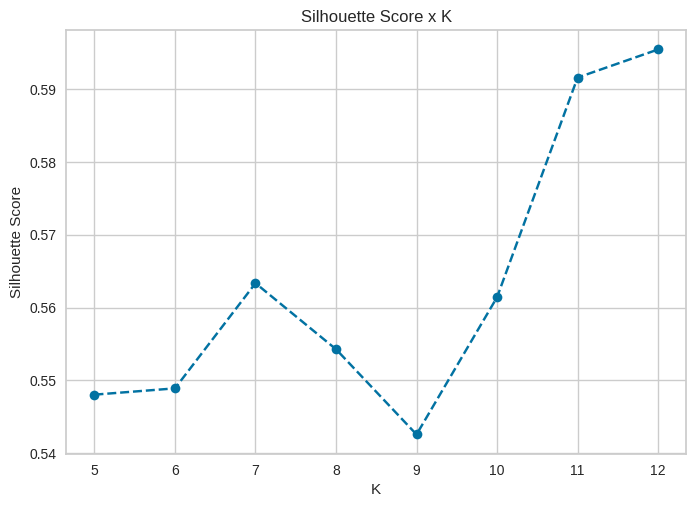

In [74]:
plt.plot(clusters, kmeans_list, linestyle = '--', marker = 'o')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## 6.3 GMM

In [75]:
gmm_list = []

for k in clusters:

    gmm_model = mx.GaussianMixture(n_components = k, random_state = 42)
    gmm_model.fit(X)

    labels = gmm_model.predict(X)

    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    gmm_list.append(sil)

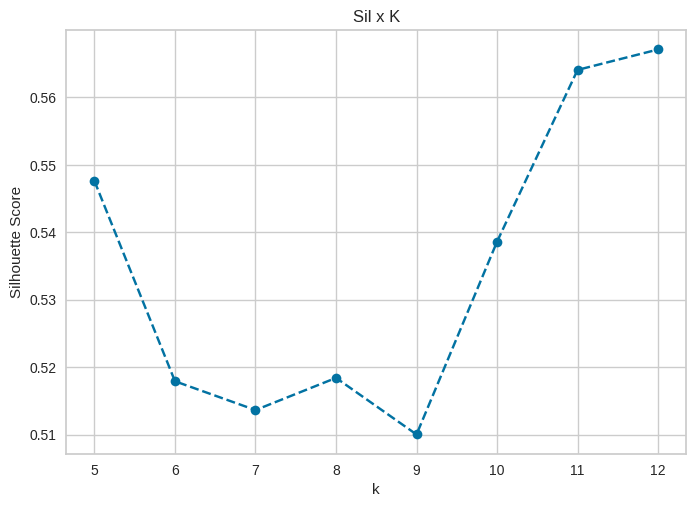

In [76]:
plt.plot(clusters, gmm_list, linestyle = '--', marker = 'o')
plt.xlabel('k');
plt.ylabel('Silhouette Score');
plt.title('Sil x K');

## 6.4 Hierarquical Cluster

In [77]:
# # definição e treino do modelo
# hc_model = hc.linkage(X, 'ward')

In [78]:
# hc.dendrogram(hc_model, truncate_mode = 'lastp', p = 12, leaf_rotation = 90, leaf_font_size = 8, show_contracted = True)
# plt.show()

In [79]:
hc_list = []

for k in clusters:
    
    # definição e treino do modelo (método Ward)
    hc_model = hc.linkage(X, 'ward')

    labels = hc.fcluster(hc_model, k, criterion = 'maxclust')

    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    hc_list.append(sil)

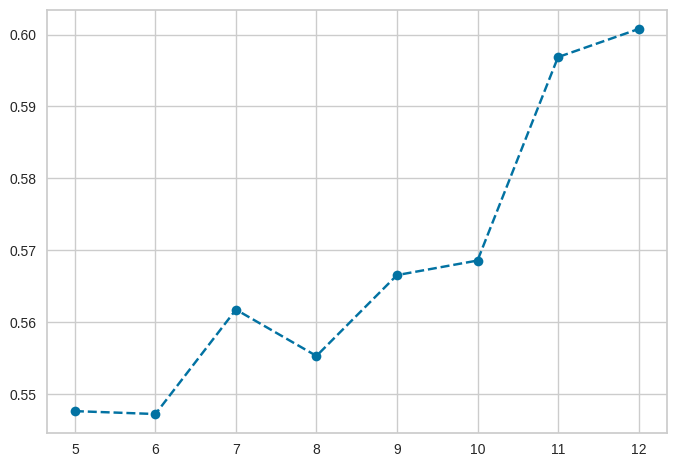

In [80]:
plt.plot(clusters, hc_list, linestyle = '--', marker = 'o', color = 'b')

## 6.5 DBScan

In [81]:
eps = 2.00 # raio epsolon
min_samples = 20 # mínimo de pontos dentro da circuferência formada pelo raio eps

dbscan_model = c.DBSCAN(eps = eps, min_samples = min_samples)

labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric = 'euclidean')
qt_clusters = len(np.unique(labels))
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format(qt_clusters))

Silhouette Score: 0.5723536610603333
Number of Clusters: 16


## 6.6 Results

In [82]:
df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list}
).T

df_results.columns = clusters
df_results

,5,6,7,8,9,10,11,12
KMeans,0.548022,0.548889,0.563352,0.554267,0.542545,0.561424,0.591633,0.595500
GMM,0.547611,0.517929,0.513661,0.518429,0.510042,0.538625,0.564086,0.567117
HC,0.547611,0.547208,0.561734,0.555288,0.566532,0.568559,0.596858,0.600764


In [83]:
df_results.style.highlight_max(color = 'lightgreen', axis = 1)

,5,6,7,8,9,10,11,12
KMeans,0.548022,0.548889,0.563352,0.554267,0.542545,0.561424,0.591633,0.595500
GMM,0.547611,0.517929,0.513661,0.518429,0.510042,0.538625,0.564086,0.567117
HC,0.547611,0.547208,0.561734,0.555288,0.566532,0.568559,0.596858,0.600764


## 6.7 Silhouette Analysis

In [84]:
# clusters_ss = np.arange(3, 9, 1)

# fig, ax = plt.subplots(3, 2)
# fig.set_size_inches(25, 20)

# for k in clusters_ss:
#     q, mod = divmod(k, 2)
    
#     ax[q-1, mod].set_xlim([-0.1, 1])
#     ax[q-1, mod].set_ylim([0, len(X) + (k+1)*10])
    
#     hc_model = hc.linkage(X, 'ward')

#     labels = hc.fcluster(hc_model, k, criterion = 'maxclust')

#     ss = m.silhouette_score(X, labels, metric = 'euclidean')
#     print('For K = {}. Silhouette Score: {}'.format(k, ss))

#     samples_silhouette_values = m.silhouette_samples(X, labels)

#     # espaço vazio entre as facas de cada cluster
#     y_lower = 10

#     # i = cluster
#     for i in range(k):

#         ith_samples_silhouette_values = samples_silhouette_values[labels == i]
#         ith_samples_silhouette_values.sort()

#         size_cluster_i = ith_samples_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         # np.arange(y_lower, y_upper), 0: popula ao longo do eixo x
#         ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values)
        
#         y_lower = y_upper + 10
        
#     ax[q-1, mod].set_yticks([])
#     ax[q-1, mod].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## 6.8 Final Model

In [85]:
k = 11

# gmm_model = mx.GaussianMixture(n_components = k, n_init = 300, random_state = 42)

# gmm_model.fit(X)

# labels = gmm_model.predict(X)

# print('SS value: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

In [86]:
kmeans_model = c.KMeans(n_clusters = k, random_state = 42) # se usar o parâmetro n_init = 300 os clusters se repetem
kmeans_model.fit(X)
    
labels = kmeans_model.predict(X)

print('SS value: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

SS value: 0.5916333198547363


# 7.0 Cluster Analysis

## 7.1 Inspection

In [87]:
df7 = X.copy()
df7['cluster'] = labels

In [88]:
# sns.scatterplot(x = 'embedding_x', y = 'embedding_y', hue = 'cluster', data = df7, palette = 'deep')

In [89]:
fig = px.scatter_3d(df7, x = 'embedding_x', y = 'embedding_y', z = 'embedding_z', color = 'cluster')
fig.show()

In [90]:
# sns.scatterplot(x = 'recency_days', y = 'gross_revenue', hue = 'cluster', data = df7, palette = 'deep')

In [91]:
# fig = px.scatter_3d(df7, x = 'recency_days', y = 'frequency', z = 'gross_revenue', color = 'cluster')
# fig.show()

## 7.2 Clusters Profiles

In [92]:
df72 = df4[cols_selected].copy()
df72['cluster'] = labels
df72.head()

,customer_id,gross_revenue,recency_days,frequency,qt_invoices,qt_products,qt_items,qt_returns,basket_size,avg_ticket,cluster
0,17850,5288.63,0.002695,17.000000,34.0,297.0,1693,40.0,48.371429,16.950737,0
1,13047,3089.10,0.017857,0.028302,9.0,171.0,1355,35.0,84.687500,15.923196,0
2,12583,6629.34,0.500000,0.040431,15.0,232.0,4978,50.0,292.823529,28.209957,5
3,13748,948.25,0.010526,0.017921,5.0,28.0,439,0.0,87.800000,33.866071,3
4,15100,635.10,0.003003,0.073171,3.0,3.0,58,22.0,9.666667,105.850000,6


In [93]:
# percentual de clientes no cluster
df_cluster = df72[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

# avg gross revenue
df_avg_gross_revenue = df72[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how = 'inner', on = 'cluster')

# avg recency days
df72['recency_days'] = df72['recency_days'].apply(lambda x: 1/x if x != 1 else 0)
df_avg_recency_days = df72[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how = 'inner', on = 'cluster')

# # avg recency days customers
# df72['avg_recency_days'] = df72['avg_recency_days'].apply(lambda x: 1/x if x != 0 else 375)
# df_avg_recency_days_customers = df72[['avg_recency_days', 'cluster']].groupby('cluster').mean().reset_index()
# df_cluster = pd.merge(df_cluster, df_avg_recency_days_customers, how = 'inner', on = 'cluster')

# avg frequency
df_frequency = df72[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_frequency, how = 'inner', on = 'cluster')

# avg invoices
df_qt_invoices = df72[['qt_invoices', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qt_invoices, how = 'inner', on = 'cluster')

# avg items
df_qt_items = df72[['qt_items', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qt_items, how = 'inner', on = 'cluster')

# avg products
df_qt_products = df72[['qt_products', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qt_products, how = 'inner', on = 'cluster')

# avg returns
df_qt_returns = df72[['qt_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_qt_returns, how = 'inner', on = 'cluster')

# avg basket size
df_basket_size = df72[['basket_size', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_basket_size, how = 'inner', on = 'cluster')

# avg ticket
df_avg_ticket = df72[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how = 'inner', on = 'cluster')

df_cluster.sort_values('gross_revenue', ascending = False)

,cluster,customer_id,perc_customer,gross_revenue,recency_days,frequency,qt_invoices,qt_items,qt_products,qt_returns,basket_size,avg_ticket
5,5,672,11.799824,8680.028333,62.815476,0.368061,11.090774,4890.242560,335.711310,104.026786,727.524960,67.538123
0,0,409,7.181738,2497.463521,37.811736,0.084686,6.672372,1537.102689,159.968215,19.672372,262.995584,24.237478
4,4,653,11.466198,1531.814334,54.791730,0.127060,4.486983,861.513017,106.117917,15.142420,230.940637,25.897507
9,9,367,6.444249,1235.462725,116.983651,0.586960,2.269755,439.956403,141.531335,4.231608,293.848425,10.071542
3,3,819,14.381036,900.112283,97.747253,0.413483,2.410256,437.595849,58.568987,5.188034,235.594955,37.136424
10,10,205,3.599649,595.327073,115.678049,0.532632,2.043902,281.317073,58.814634,4.341463,177.571684,21.058037
8,8,727,12.765584,446.645791,132.220083,0.645122,1.701513,186.632737,42.935351,3.281981,130.349186,14.993515
1,1,583,10.237050,279.016123,149.037736,0.774125,1.379074,139.257290,15.672384,2.114923,109.960563,30.533025
6,6,364,6.391572,235.793846,186.109890,0.868411,1.208791,72.752747,21.906593,0.832418,63.487206,21.051157
7,7,509,8.937665,114.502554,190.280943,0.967501,1.100196,30.499018,11.302554,1.108055,28.373772,22.577962


In [94]:
# teste t-student para gerar intervalos de confiança (variação dos valores médios do gross_revenue)
# pode servir como critério estatístico para eleger ou remover um cliente do Insiders
df_insiders = df72.loc[df72['cluster'] == 5, 'gross_revenue']

# df: degrees of freedom (graus de liberdade)
st.t.interval(confidence = 0.95, df = len(df_insiders)-1, loc = np.mean(df_insiders), scale = st.sem(df_insiders))

(7168.648773746385, 10191.407892920286)

# 8.0 Business Report

## 8.1 Insiders Profile

- Número de clientes: 672 (11,80% da base).
- Faturamento médio: US\$ 8680,03.
- Recência média: 63 dias desde a última compra.
- Frequência média: 0,368 compras por dia (aproximadamente 1 compra a cada 3 dias).
- Quantidade média de pedidos: 11 pedidos por cliente.
- Quantidade média de devoluções: 104 devoluções por cliente.
- Tamanho médio da cesta: 727 produtos por pedido.
- Ticket médio: US\$ 67,54.

## 8.2 Insiders Customers

In [95]:
df82 = df72[df72['cluster'] == 5]['customer_id']
df82.head()

2    12583
5    15291
6    14688
7    17809
8    15311
Name: customer_id, dtype: int64

In [96]:
# # Exportando conjunto csv
# df82.to_csv('insiders.csv', header = 'customer_id', index = False) 

## 8.3 Insiders Percentage of Gross Revenue

In [97]:
df_insiders_gr = df_cluster.loc[df_cluster['cluster'] == 5, 'gross_revenue'].sum()
df_all_gr = df_cluster.loc[:, 'gross_revenue'].sum()

print('Insiders Percentage of Gross Revenue: {:.2f}%.'.format(100*(df_insiders_gr/df_all_gr)))

Insiders Percentage of Gross Revenue: 52.53%.


## 8.4 Insiders vs Base Comparison

In [98]:
# cluster insiders
df84_insiders = df_cluster.loc[df_cluster['cluster'] == 5]

In [99]:
# base completa
df84_base = df_cluster.copy()

In [100]:
# gross_revenue
insiders_gross_revenue = round(df84_insiders['gross_revenue'].mean(), 2)
base_gross_revenue = round(df84_base['gross_revenue'].mean(), 2)

print(f'Insiders Gross Revenue: US$ {insiders_gross_revenue} vs Base Gross Revenue: US$ {base_gross_revenue}.')

Insiders Gross Revenue: US$ 8680.03 vs Base Gross Revenue: US$ 1502.23.


In [101]:
# frequency
insiders_frequency = round(df84_insiders['frequency'].mean(), 2)
base_frequency = round(df84_base['frequency'].mean(), 2)

print(f'Insiders Frequency: {insiders_frequency} buys/day vs Base Frequency: {base_frequency} buys/day.')

Insiders Frequency: 0.37 buys/day vs Base Frequency: 0.58 buys/day.


In [102]:
# recency
insiders_recency = round(df84_insiders['recency_days'].mean(), 2)
base_recency = round(df84_base['recency_days'].mean(), 2)

print(f'Insiders Recency: {insiders_recency} days vs Base Recency: {base_recency} days.')

Insiders Recency: 62.82 days vs Base Recency: 121.53 days.


In [103]:
# qt_invoices
insiders_invoices = round(df84_insiders['qt_invoices'].mean(), 2)
base_invoices = round(df84_base['qt_invoices'].mean(), 2)

print(f'Insiders Invoices: {insiders_invoices} vs Base Invoices: {base_invoices}.')

Insiders Invoices: 11.09 vs Base Invoices: 3.22.


In [104]:
# qt_returns
insiders_returns = round(df84_insiders['qt_returns'].mean(), 2)
base_returns = round(df84_base['qt_returns'].mean(), 2)

print(f'Insiders Returns: {insiders_returns} vs Base Returns: {base_returns}.')

Insiders Returns: 104.03 vs Base Returns: 33.11.


In [105]:
# avg_ticket
insiders_avg_ticket = round(df84_insiders['avg_ticket'].mean(), 2)
base_avg_ticket = round(df84_base['avg_ticket'].mean(), 2)

print(f'Insiders Average Ticket: US$ {insiders_avg_ticket} vs Base Average Ticket: US$ {base_avg_ticket}.')

Insiders Average Ticket: US$ 67.54 vs Base Average Ticket: US$ 25.53.


In [106]:
# basket_size
insiders_basket_size = round(df84_insiders['basket_size'].mean(), 2)
base_basket_size = round(df84_base['basket_size'].mean(), 2)

print(f'Insiders Average Basket Size: {insiders_basket_size} vs Base Average Basket Size: {base_basket_size}.')

Insiders Average Basket Size: 727.52 vs Base Average Basket Size: 205.72.


# 9. Saving Pickle Files

In [107]:
# features local
pickle.dump(mm_gross_revenue, open('src/features/gross_revenue.pkl', 'wb'))
pickle.dump(mm_recency_days, open('src/features/recency_days.pkl', 'wb'))
pickle.dump(mm_qt_invoices, open('src/features/qt_invoices.pkl', 'wb'))
pickle.dump(mm_qt_products, open('src/features/qt_products.pkl', 'wb'))
pickle.dump(mm_qt_items, open('src/features/qt_items.pkl', 'wb'))
pickle.dump(mm_avg_ticket, open('src/features/avg_ticket.pkl', 'wb'))
pickle.dump(mm_frequency, open('src/features/frequency.pkl', 'wb'))
pickle.dump(mm_qt_returns, open('src/features/qt_returns.pkl', 'wb'))
pickle.dump(mm_basket_size, open('src/features/basket_size.pkl', 'wb'))

# models local
pickle.dump(rf_model, open('src/models/rf_model.pkl', 'wb'))
pickle.dump(reducer, open('src/models/reducer.pkl', 'wb'))

# 10.0 Connecting a SQLite Database

In [108]:
# # conectando ao sqlite ou criando um novo database caso não exista
# host = 'sqlite:///insiders_db.sqlite'
# conn = create_engine(host)

In [109]:
# # drop table (caso já exista uma tabela)
# query_drop_insiders = """
#     DROP TABLE insiders
# """

In [110]:
# # criação da tabela (rodar só uma vez)
# query_create_table_insiders = """
#     CREATE TABLE insiders (
#         customer_id   INTEGER,
#         gross_revenue REAL,
#         recency_days  INTEGER,
#         frequency     INTEGER,
#         qt_invoices   INTEGER,
#         qt_products   INTEGER,
#         qt_items      INTEGER,
#         qt_returns    INTEGER,
#         basket_size   INTEGER,
#         avg_ticket    INTEGER,
#         cluster       INTEGER)
# """

In [111]:
# # dropar a tabela caso já exista
# conn.execute(query_drop_insiders)
# conn.commit()
# conn.close()

In [112]:
# # inserindo os dados na tabela criada
# df72.to_sql('insiders', con = conn, if_exists = 'append', index = False)

In [113]:
# # trazendo os dados
# query = """
#     SELECT * FROM insiders
# """

# df = pd.read_sql_query(query, conn)
# df.head()